   Publishing Year                        Book Name  \
0           1975.0                          Beowulf   
1           1987.0                 Batman: Year One   
2           2015.0                Go Set a Watchman   
3           2008.0  When You Are Engulfed in Flames   
4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267  genre fiction   
2        Novice        

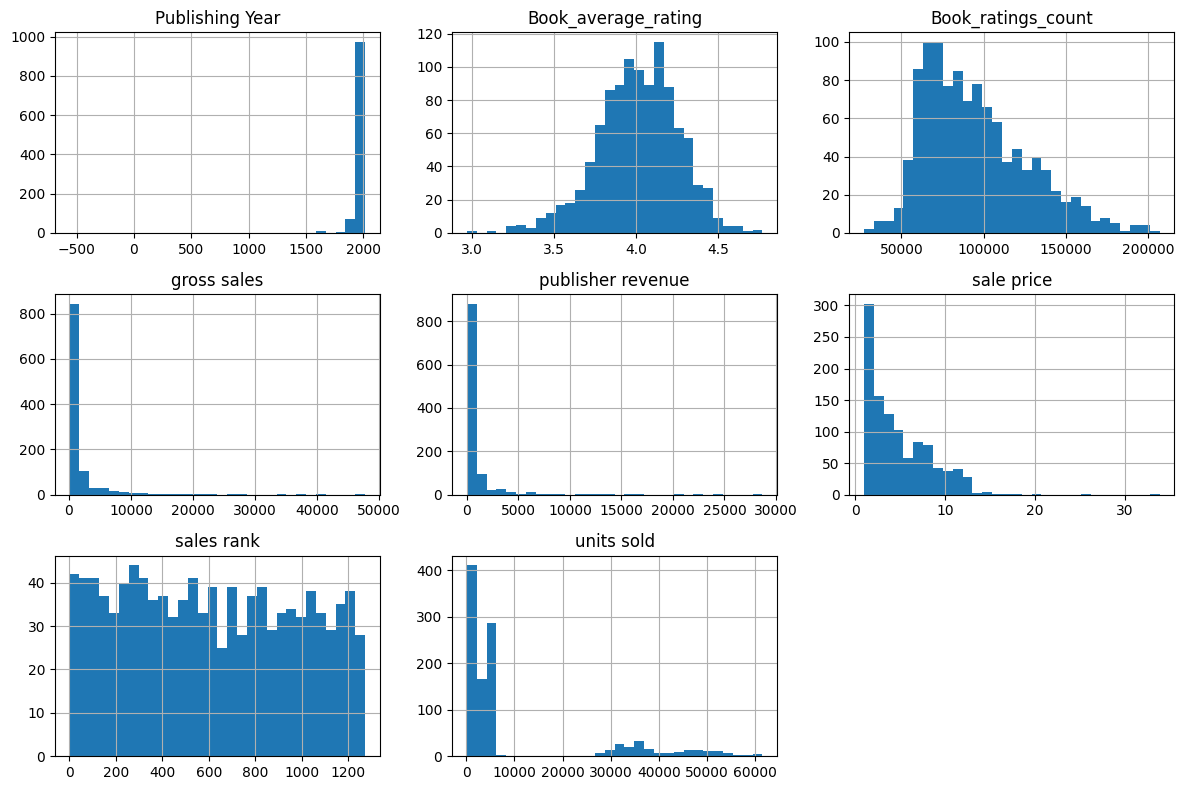

c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


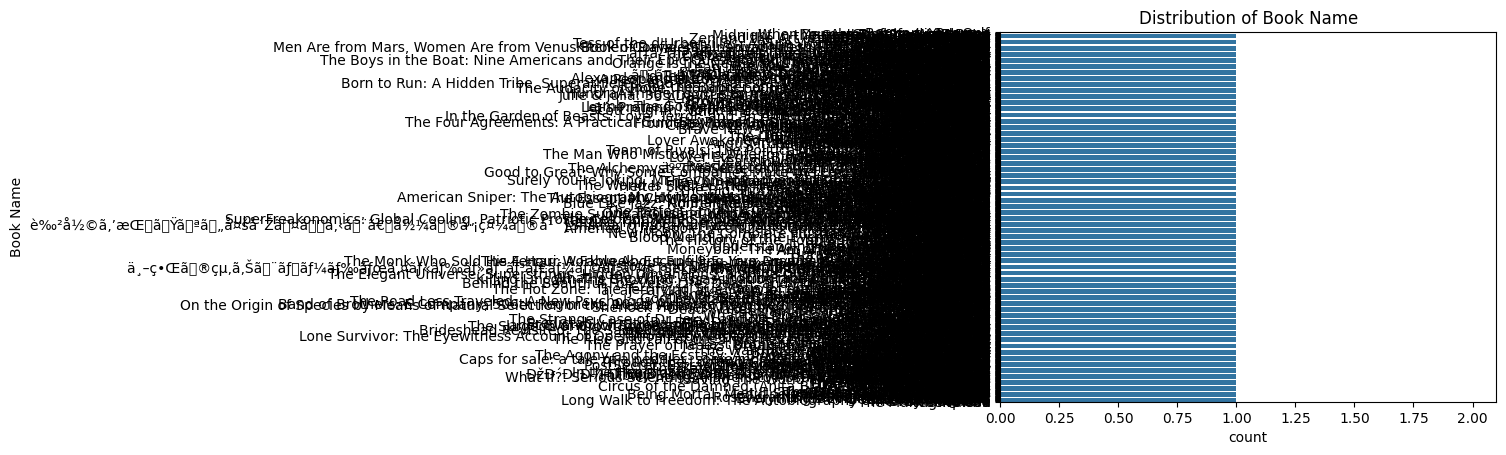

c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\owner\OneDrive\Varsity\2025\PGDDA\S2\PDAN\Projects\POE-Part-2\venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


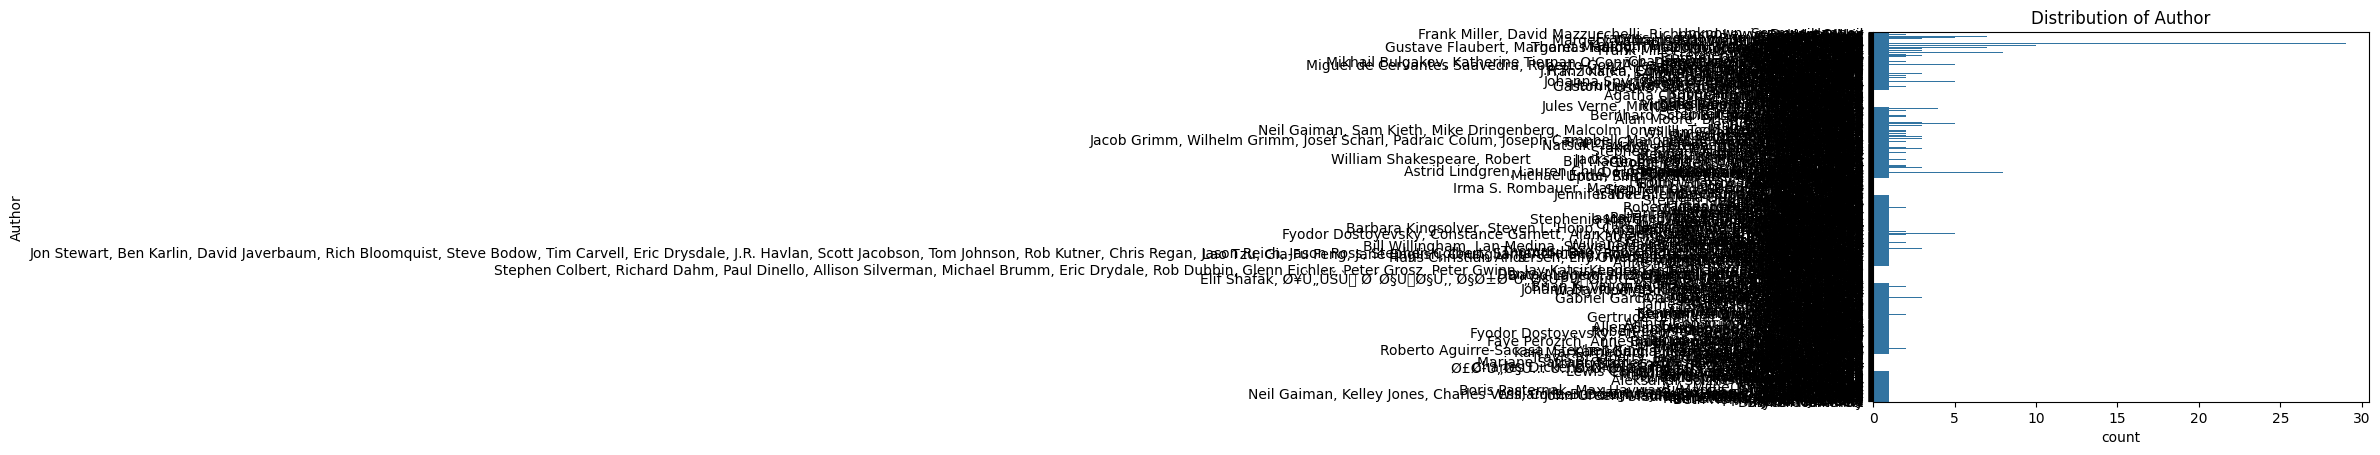

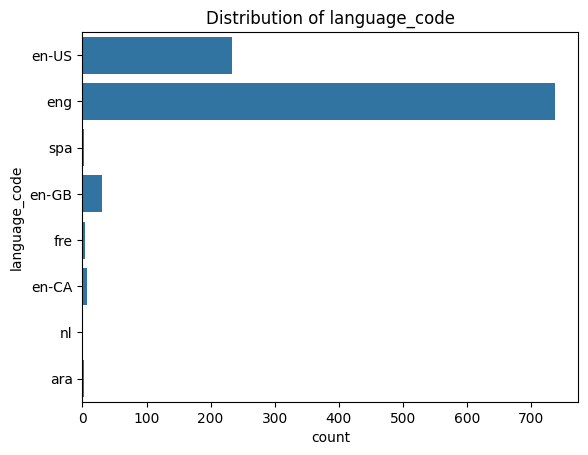

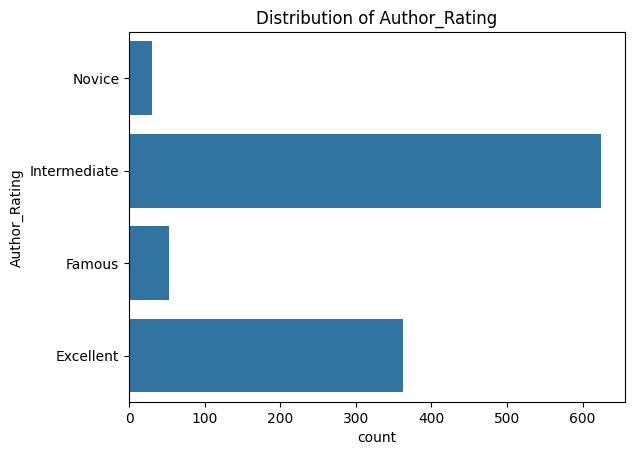

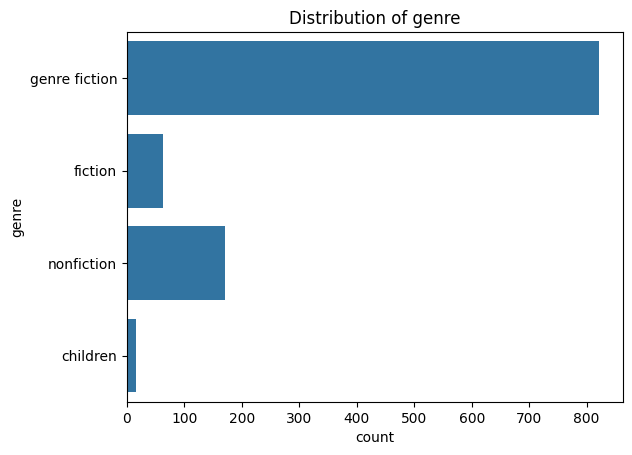

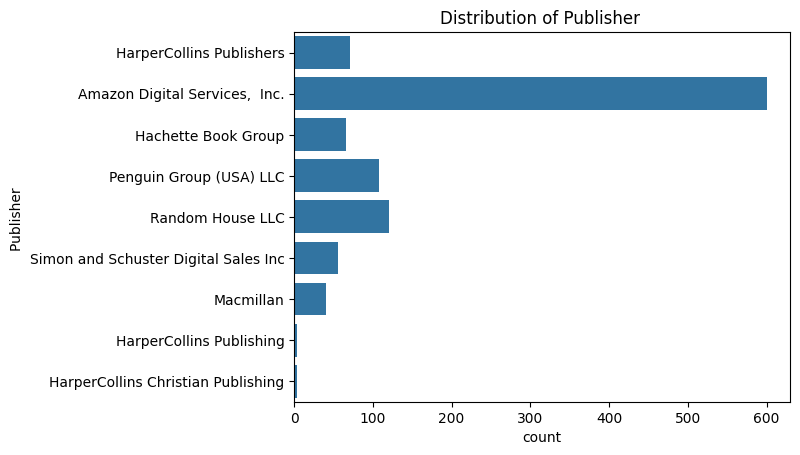

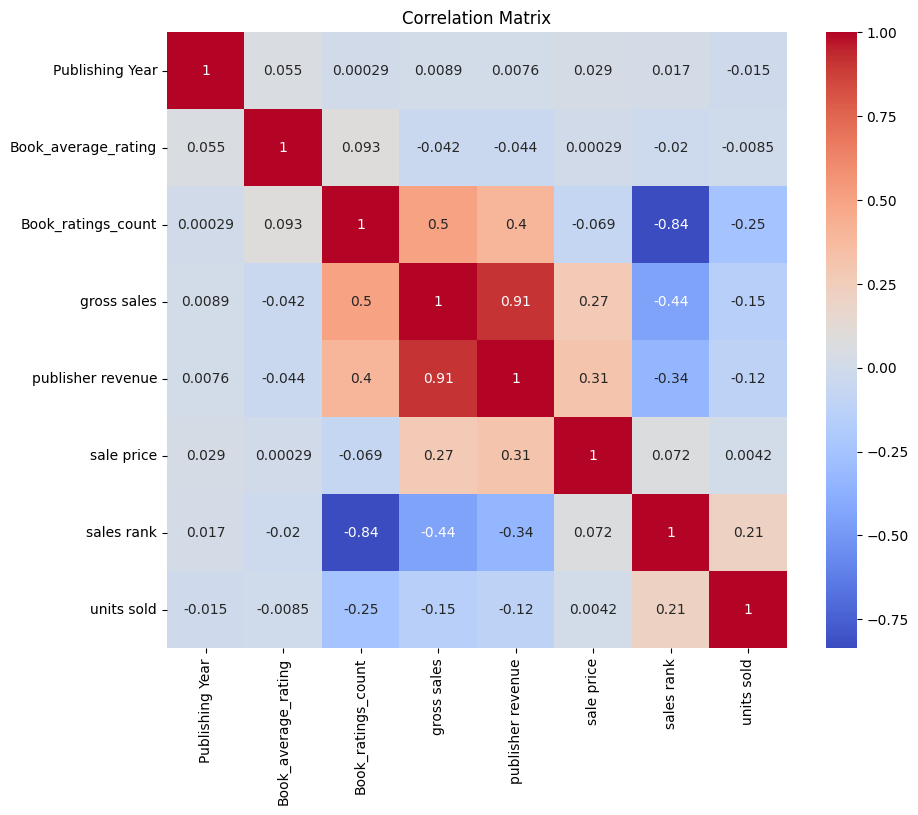

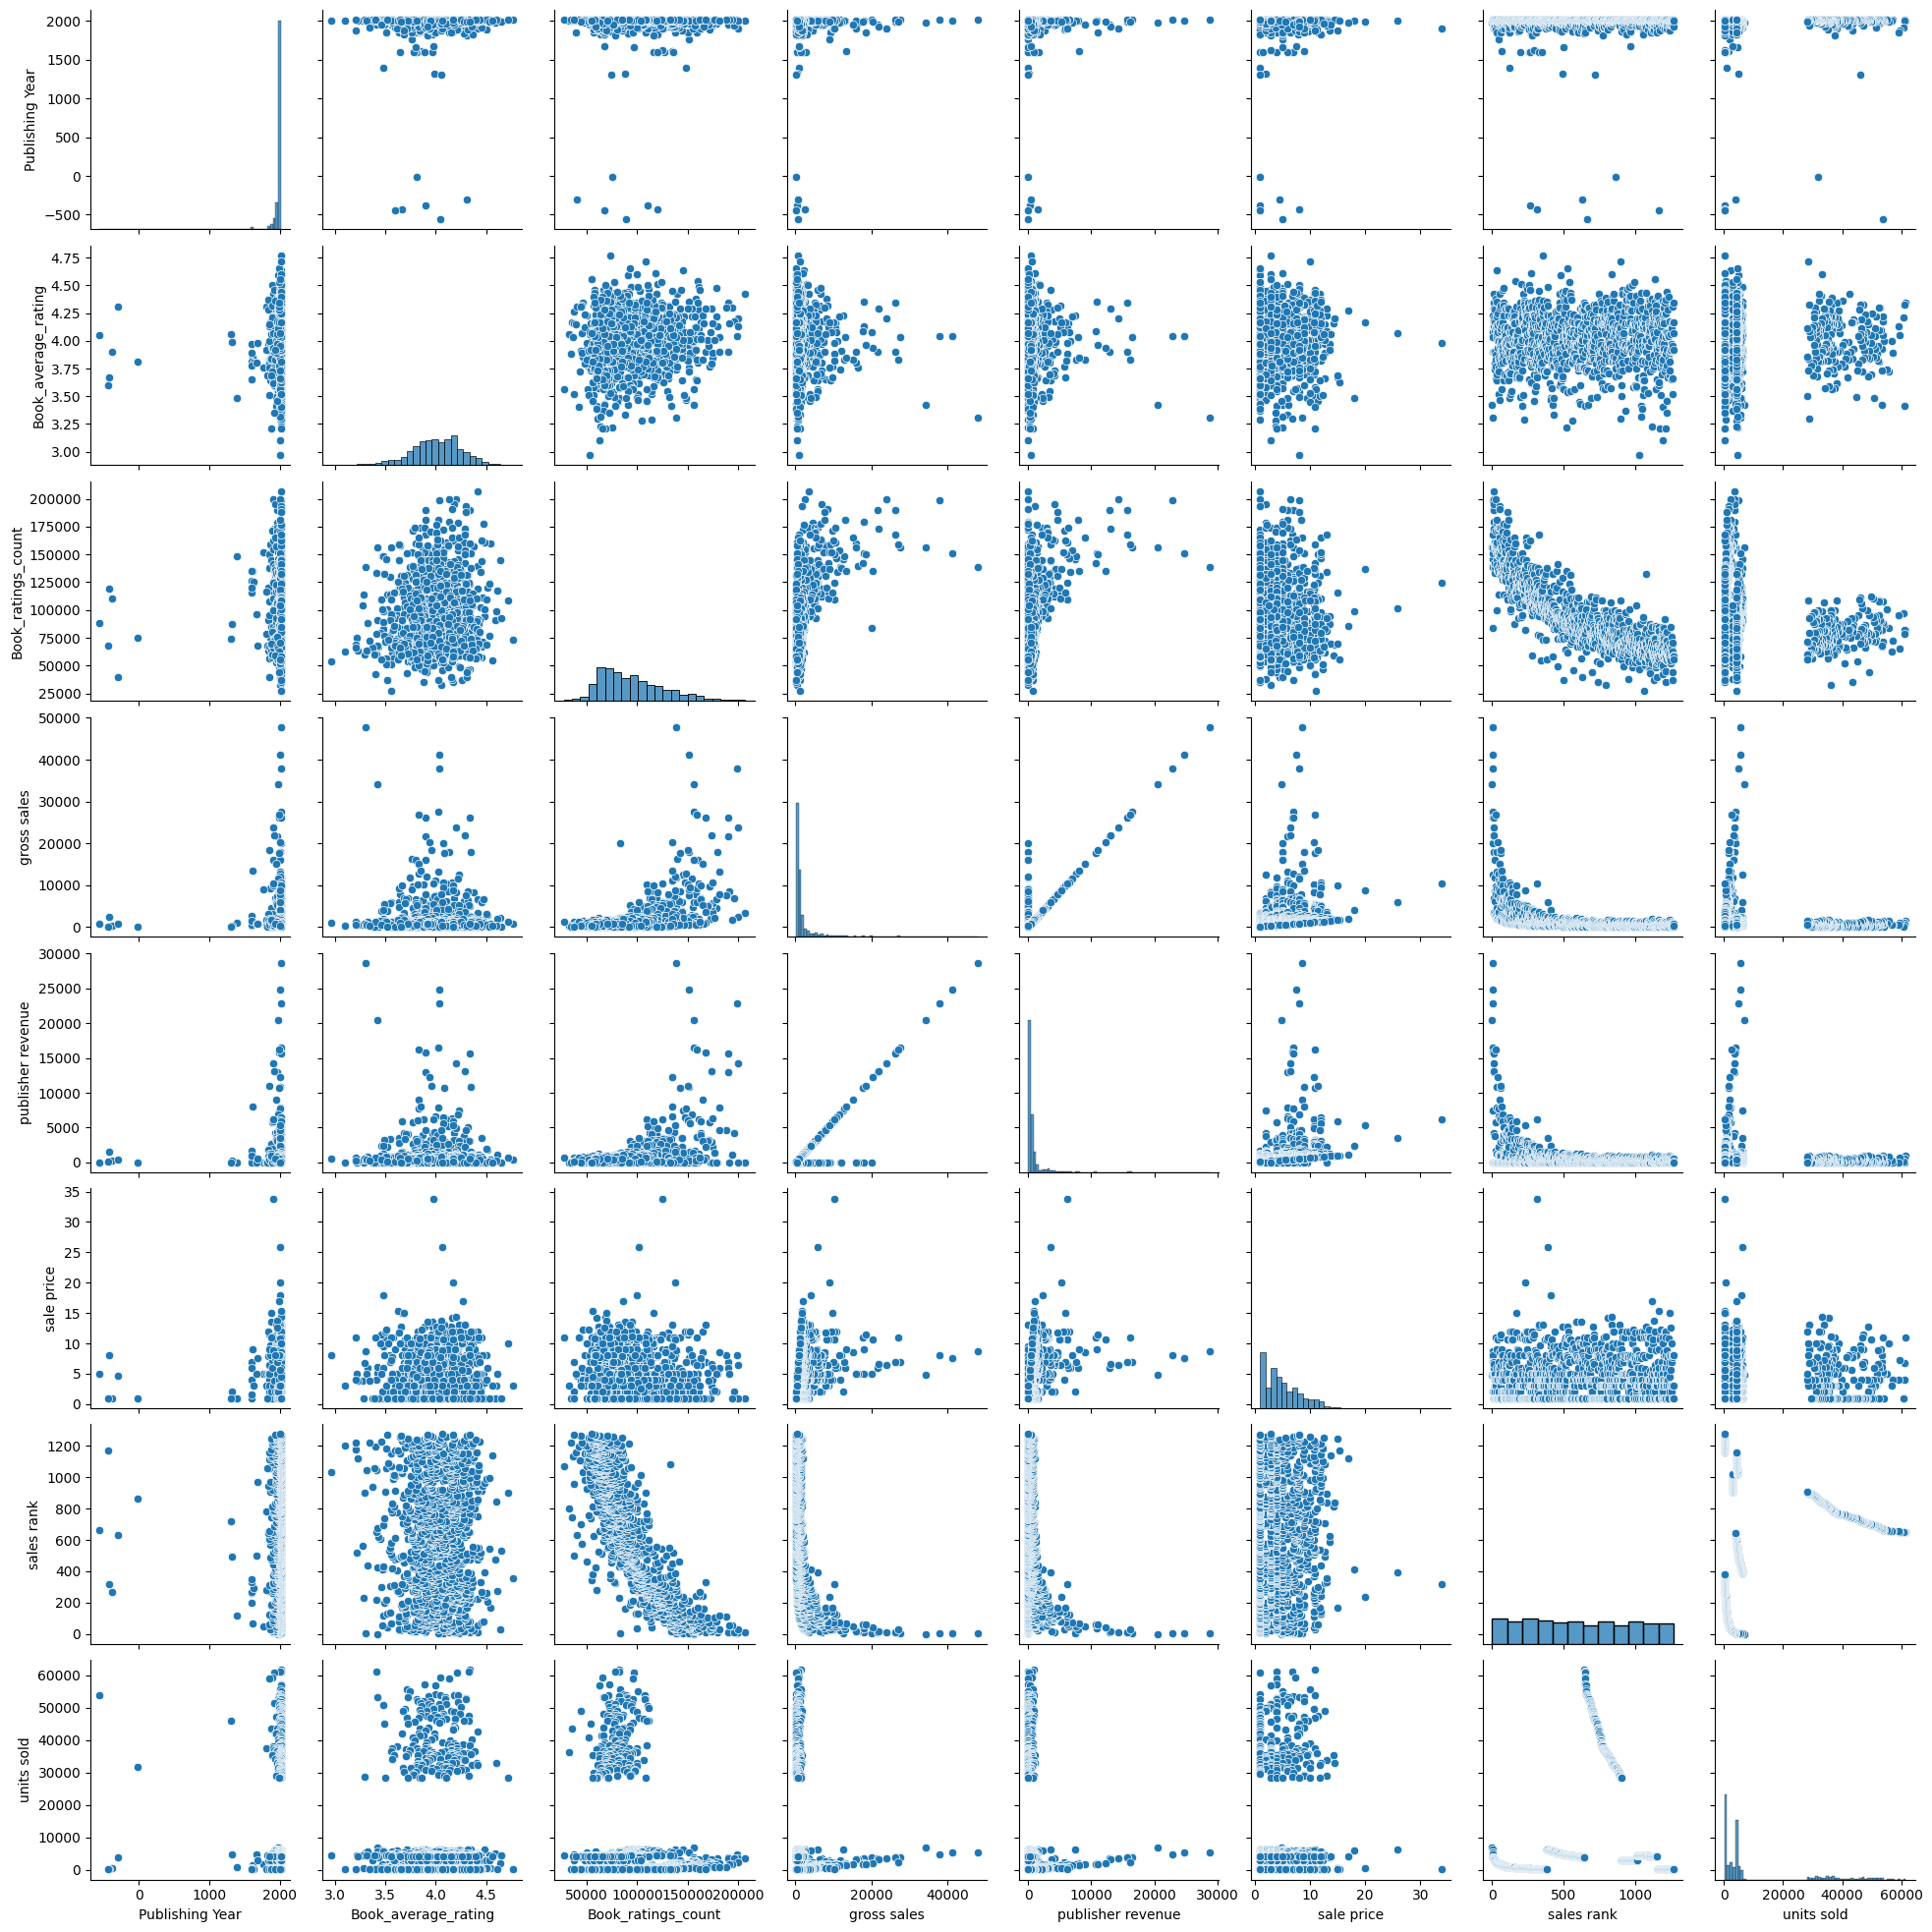

In [2]:
# EDA
# import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read from datafile
df = pd.read_csv('../data/Books_Data_Clean.csv')

# View first few rows
print(df.head())

# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Column info
print(df.info())

# Summary statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

# Unique values per column
print(df.nunique())

# Distribution of numerical features
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Count plots for categorical features
for col in df.select_dtypes(include='object').columns:
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for key relationships
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

In [3]:
# more imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load and prepare data
df = pd.read_csv('../data/Books_Data_Clean.csv')

# Define threshold for "selling well"
threshold = 6000
df['Will_Sell'] = (df['units sold'] >= threshold).astype(int)

# Define target and features
target = 'Will_Sell'
X = df.drop(columns=[target])
y = df[target]

# Drop rows with NaNs and align
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]
df_clean = df.loc[X_clean.index]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X_clean, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.8, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("✅ Best parameters:", grid.best_params_)

# Evaluate on test set
print("\n📊 Evaluation on Test Set:")
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Cross-validation on full dataset
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y_clean, cv=5, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

# Predict probabilities and classes for all rows
df_clean['Will_Sell_Prob'] = grid.predict_proba(X_scaled)[:, 1]
df_clean['Will_Sell_Predicted'] = grid.predict(X_scaled)

✅ Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

📊 Evaluation on Test Set:
[[632   0]
 [ 15 153]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       632
           1       1.00      0.91      0.95       168

    accuracy                           0.98       800
   macro avg       0.99      0.96      0.97       800
weighted avg       0.98      0.98      0.98       800


Cross-validation scores: [0.905 1.    1.    1.    1.   ]
Mean accuracy: 0.9810000000000001
Std deviation: 0.03799999999999999


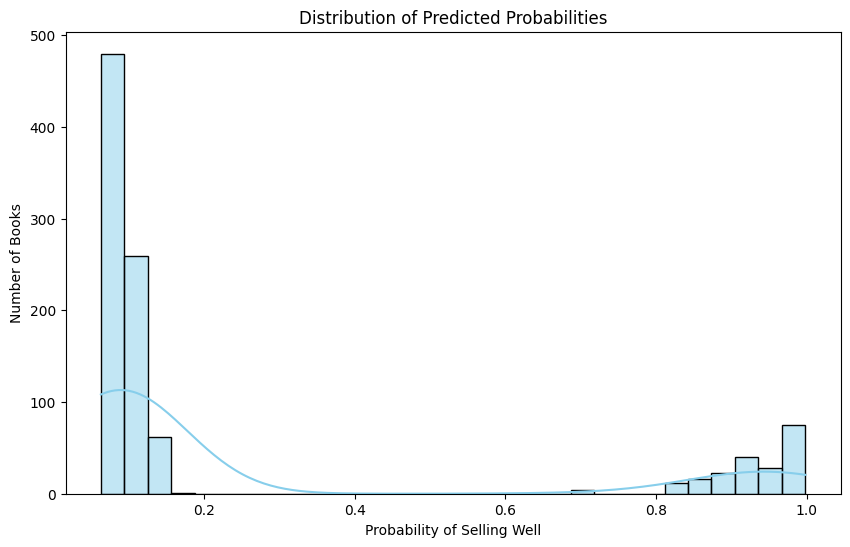

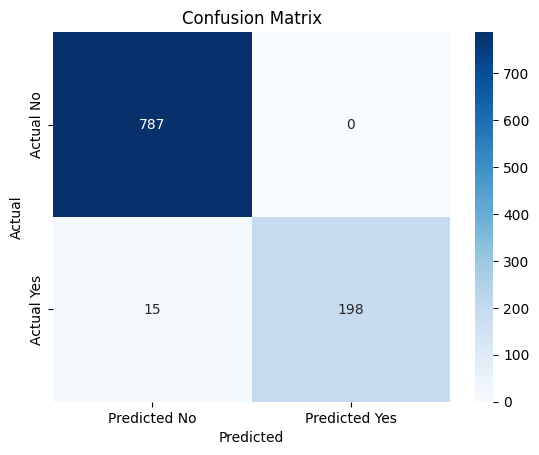

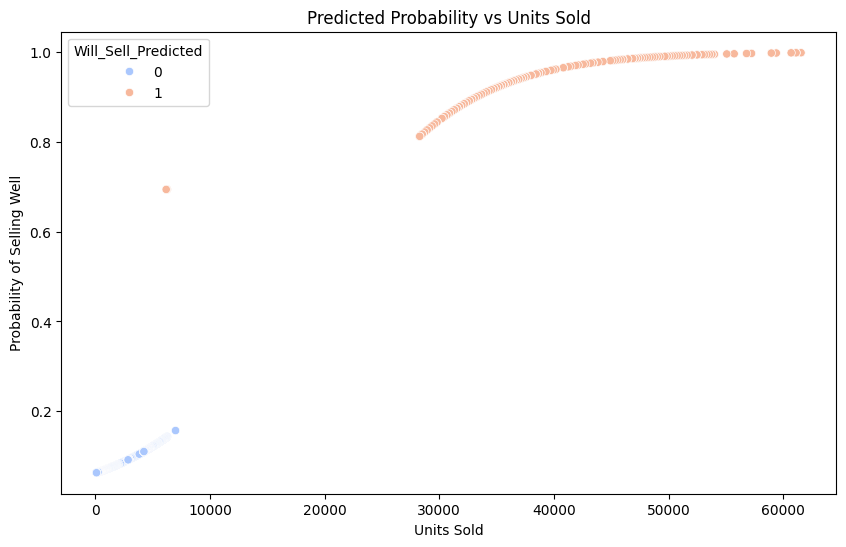

C:\Users\owner\AppData\Local\Temp\ipykernel_24444\2393952694.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


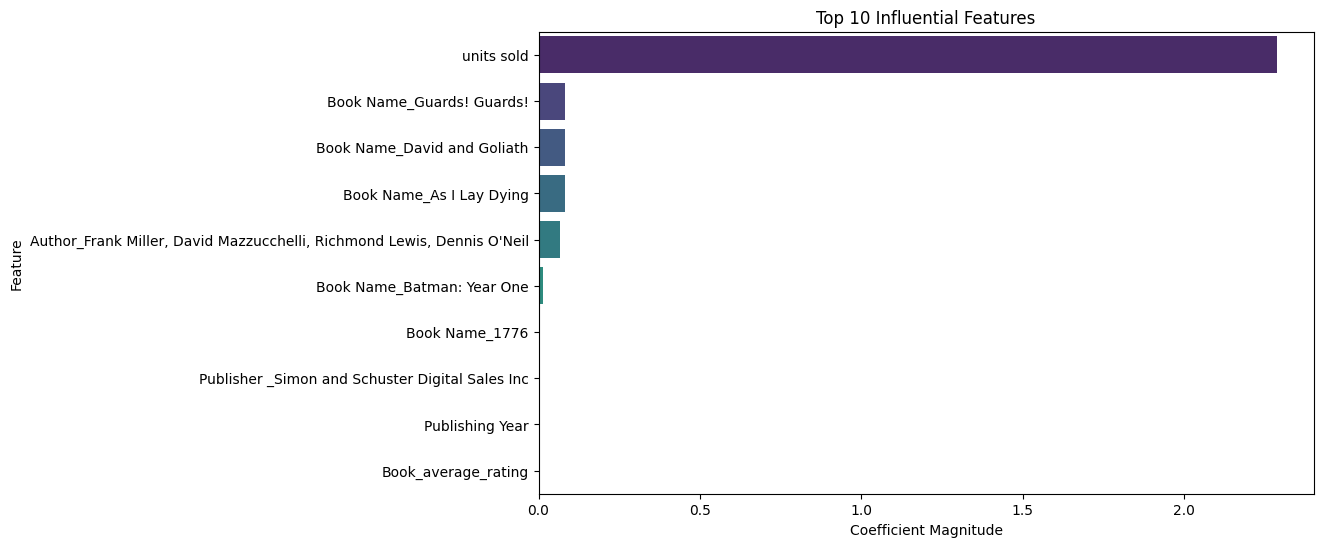

In [4]:
# View predictions
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Will_Sell_Prob'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Selling Well')
plt.ylabel('Number of Books')
plt.show()

# Confusion matrix visualization
cm = confusion_matrix(df_clean['Will_Sell'], df_clean['Will_Sell_Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Scatter plot of predicted probabilities vs units sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='units sold', y='Will_Sell_Prob',
                hue='Will_Sell_Predicted', palette='coolwarm')
plt.title('Predicted Probability vs Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Probability of Selling Well')
plt.show()


# Feature importance
importance = pd.Series(grid.best_estimator_.coef_[0], index=X_encoded.columns)
top_features = importance.abs().sort_values(ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Influential Features')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

# Save the cleaned dataframe with predictions
df_clean.to_csv('../data/Books_Data_With_Predictions.csv', index=False)

                                  Actual Top Sellers  Units Sold  \
0  New Moon: The Complete Illustrated Movie Compa...       61560   
1                                      Maybe Someday       61128   
2                                           Mr Maybe       61128   
3                                 Anne of the Island       60696   
4                            Also sprach Zarathustra       59400   
5                                    North and South       58968   
6                                      A Stolen Life       57240   
7                            The Immortals of Meluha       56808   
8                                     The Lost World       55728   
9                                            Requiem       55080   

                               Predicted Top Sellers  Predicted Probability  
0  New Moon: The Complete Illustrated Movie Compa...               0.998301  
1                                      Maybe Someday               0.998189  
2                

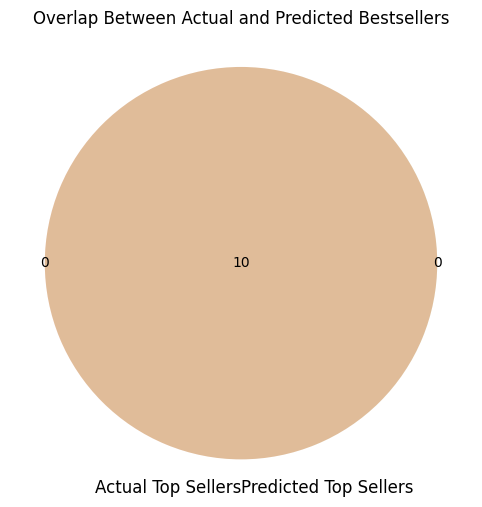

🔮 Predicted Bestsellers Not in Actual Top 10:


In [5]:
# Compare actual vs predicted top selling books
actual_top = df_clean.sort_values(by='units sold', ascending=False).head(10)
predicted_top = df_clean.sort_values(by='Will_Sell_Prob', ascending=False).head(10)
comparison_df = pd.DataFrame({
    'Actual Top Sellers': actual_top['Book Name'].values,
    'Units Sold': actual_top['units sold'].values,
    'Predicted Top Sellers': predicted_top['Book Name'].values,
    'Predicted Probability': predicted_top['Will_Sell_Prob'].values
})

print(comparison_df)

from matplotlib_venn import venn2

actual_titles = set(actual_top['Book Name'])
predicted_titles = set(predicted_top['Book Name'])

# Venn diagram to show overlap
plt.figure(figsize=(8, 6))
venn2([actual_titles, predicted_titles], set_labels=('Actual Top Sellers', 'Predicted Top Sellers'))
plt.title('Overlap Between Actual and Predicted Bestsellers')
plt.show()

# Books predicted as top sellers but not actually top sellers
false_positives = predicted_titles - actual_titles
print("🔮 Predicted Bestsellers Not in Actual Top 10:")
for title in false_positives:
    print(f"- {title}")